<a href="https://colab.research.google.com/github/harsh0522/EVA8.0-/blob/main/Session%202.5%20PyTorch%20101/Session_2_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Pytorch](https://miro.medium.com/max/1024/1*KKADWARPMxHb-WMxCgW_xA.png)
# Pytorch

An open source machine learning framework that accelerates the path from research prototyping to production deployment.

It is a deep learning framework and a scientific computing package.

It has several components that you'd like to be aware of (from future perspective):
* PyTorch is production ready. With **torchScript**, PyTorch provides ease-of-use and flexiblility in _eager_ mode, while seamlessly  transitioning to graph mode for speed, optimization, and functionality in C++ runtime environments.
* **TorchServe** is an easy to use tool for deploying PyTorch models at scale. It is cloud and environment agnostic and supports features such as multi-model serving, logging, metrics and the creation of RESTful endpoints for application integration.
* Optimized performance in both research and production by taking advantage of native support for asynchronous execution of collective operations and peer-to-peer communication that is accessible from Python and C++.
* PyTorch supports an end-to-end workflow from Python to deployment on iOS and Android. It extends the PyTorch API to cover common preprocessing and integration tasks needed for incorporating ML in mobile applications.
* An active community of researchers and developers have built a rich ecosystem of tools and libraries for extending PyTorch and supporting development in areas from computer vision to reinforcement learning.
* Export models in the standard **ONNX** (Open Neural Network Exchange) format for direct access to ONNX-compatible platforms, runtimes, visualizers, and more.
* The C++ frontend is a pure C++ interface to PyTorch that follows the design and architecture of the established Python frontend. It is intended to enable research in high performance, low latency and bare metal C++ applications.
* PyTorch is well supported on major cloud platforms, providing frictionless development and easy scaling through prebuilt images, large scale training on GPUs, ability to run models in a production scale environment, and more.

| **PyTorch**  | **TensorFlow**  | 
|---|---|
| Dynamic Computation Graphs  | Had to integrate Keras to add Dynamic Graphs, else static graphs  |
| Have explicit GPU and CPU controls  | 2.0 has made this slighyl easy compared to earlier  |
| More Pythonic in nature  | Steep learning curve  |
| Good Documentation | Best possible documentation |
| External tool for visualization and logging | TensorBoard |
| Lighter to work with | Large deployment dependencies |
| _Debugging is difficult_ | _Better debugging capabilities_ |


![comparison](https://miro.medium.com/max/744/1*IsaBkifkc5P7ihRA8IKQ8Q.png)

Note: In the above graph anything over 50% means more mentions for PyTorch than TensorFlow for that conference.



## Scientific Computing

The scientific computing aspect of PyTorch is primarily a result of PyTorch's tensor Library and associated tensor operations

A tensor is an n-dimensional array. 

![tensor](https://res.cloudinary.com/practicaldev/image/fetch/s--VaxrSdrA--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://thepracticaldev.s3.amazonaws.com/i/bp6ux6ppf5t5amwkxklq.jpg)


### Numpy
One of the most popular scientific computing package for working with Tensors is nunmpy. 
![numpy](https://res-3.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/gxgj1nsz0eq3rg13j7kk)

Numpy is the go-to package for nD arrays. PyTorch's tensor library mirrors numpy nD array capabilities very closely and in addition is highly interoprable with numpy. In PyTorch GPU support for tensors is inbuilt, and it is vey easy to move arrays from numpy (CPU) to GPU. 




#### PyTorch Philosophy

* Stay out of the way
* Cater to the impatient
* Promote linear code-flow
* Full interop with the Python ecosystem
* Be as fasst as anything else

#### Debugging

* PyTorch is Python Extension
* You can use any Python Debugger
* Even _print_ function works on PyTorch objects

## Why it got so popular?

To solve deep neural networks, we need to calculate derivates, and to do this computationally, deep learning frameworks use what are called **computational graphs**. 
![cgs](https://blog.paperspace.com/content/images/2019/03/full_graph.png)

PyTorch introduced **Dynamic Computational Graphs**, a first in the industry. It means that the graph is generated on the fly as the operations occur in contrast to _static graphs_ that are fully determined before actual action occur. 

Experimentation, advanced models and quick tests need Dynamic Computation Graphs as a back-end feature. 

# Let's do some coding now. 

### Pytorch's tensors are similar to Numpy's ndarrays

In [ ]:
!pip install torch

In [ ]:
import numpy as np

V0 = np.array(1.3)
V1 = np.array([1., 2., 3.])
V2 = np.array([[1., 2.], [4., 5.]])
print(f'{V0} - {V1} - {V2}')

1.3 - [1. 2. 3.] - [[1. 2.]
 [4. 5.]]


In [ ]:
numpy_array = np.array([1, 2, 3])

In [ ]:
import torch

In [ ]:
t1 = torch.Tensor(numpy_array)
# Constructor - same as torch.FloatTensor
# uses a default float32 tensor, this behavior can be changed
# all other tensors inherit from this main tensor class

In [ ]:
numpy_array.dtype, t1.dtype

(dtype('int64'), torch.float32)

In [ ]:
t2 = torch.tensor(numpy_array)
# Factory function
# going to produce a new tensor of the same type
# does not share underlying memory with numpy!
# always copies the data
# torch.tensor(data, dtype=None, device=None, requires_grad=False/True)
# highly recommended to use!
numpy_array.dtype, t2.dtype

(dtype('int64'), torch.int64)

In [ ]:
t3 = torch.as_tensor(numpy_array)
# Factory Function
# going to produce a tensor of the same type
# shares the underlying memory with numpy! changing one, will change other
# CAN ACCEPT ANY PYTHON DATA STRUCTURE INCLUDING NUMPY ARRAY!
# always tries to avoid a copy, if will have to copy if you want GPU, change dtype
# we have to manually call requires_grad() function
# recommended to use for other data structure
numpy_array.dtype, t3.dtype

(dtype('int64'), torch.int64)

In [ ]:
t4 = torch.from_numpy(numpy_array)
# Factory Function
# going to produce a tensor of the same type
# shares the underlying memory with numpy, changing one will change other
# CAN ACCEPT ONLY NUMPY ARRAYS
numpy_array.dtype, t4.dtype

(dtype('int64'), torch.int64)

In [ ]:
numpy_array.dtype, t1.dtype, t2.dtype, t3.dtype, t4.dtype

(dtype('int64'), torch.float32, torch.int64, torch.int64, torch.int64)

### Sharing memory for performance: copy vs share

| Share Data |Copy Data |
|----|----|
|torch.as_tensor() | torch.tensor() |
|torch.from_numpy() | torch.Tensor() |   
  
> **Zero Memory Copy** ⇋ Very Efficient

### Something to keep in mind
* Since numpy.array objects are allocated on CPU, the `as_tensor()` function must copy the data from the CPU to the GPU when a GPU is being used
* The memory sharing of `as_tensor()` doesn't work with built-in Python data structure like list
* The `as_tensor()` call requires developer knowledge of the sharing feature. This is necessary so we don't make an unwanted change in the underlying data without realising it
* The `as_tensor()` performance improvement will be greater when there are a lot of back and forth operations between `numpy.array` objects and tensor objects. 




In [ ]:
numpy_array *= 4

numpy_array

array([ 4,  8, 12])

In [ ]:
t1, t2, t3, t4

(tensor([1., 2., 3.]),
 tensor([1, 2, 3]),
 tensor([ 4,  8, 12]),
 tensor([ 4,  8, 12]))

In [ ]:
t1 *= 2
numpy_array, t1, t2, t3, t4

(array([ 4,  8, 12]),
 tensor([2., 4., 6.]),
 tensor([1, 2, 3]),
 tensor([ 4,  8, 12]),
 tensor([ 4,  8, 12]))

In [ ]:
t2 *= 2
numpy_array, t1, t2, t3, t4

(array([ 4,  8, 12]),
 tensor([2., 4., 6.]),
 tensor([2, 4, 6]),
 tensor([ 4,  8, 12]),
 tensor([ 4,  8, 12]))

In [ ]:
t3 *= 2
numpy_array, t1, t2, t3, t4

(array([ 8, 16, 24]),
 tensor([2., 4., 6.]),
 tensor([2, 4, 6]),
 tensor([ 8, 16, 24]),
 tensor([ 8, 16, 24]))

In [ ]:
t5 = t4.cuda()
t5.device, t4.device

(device(type='cuda', index=0), device(type='cpu'))

In [ ]:
t6 = t4 + t3
t6

tensor([16, 32, 48])

In [ ]:
t6 = t4 + t5
t6

RuntimeError: ignored

In [ ]:
torch.eye(2)

tensor([[1., 0.],
        [0., 1.]])

In [ ]:
torch.zeros(2,2)

tensor([[0., 0.],
        [0., 0.]])

In [ ]:
torch.ones(2, 3)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [ ]:
torch.rand(2, 4)

tensor([[0.7530, 0.4493, 0.5864, 0.4855],
        [0.3900, 0.9327, 0.7894, 0.7046]])

In [ ]:
data = torch.tensor([[1, 2, 3], [4, 5, 6]])
data[1, 0], data[0, 0:2], data[:2, :2]

(tensor(4), tensor([1, 2]), tensor([[1, 2],
         [4, 5]]))

#### Torch.tensor attributes

| Attribute | Data Type | Description | 
|----|----|----|
|data|array_like | list, tuple, NumPy ndarray, scalar |
|dtype| torch.dtype | The tensor's data type|
|requires_grad | bool| Should autograd record operation |
|device | torch.device | Allocated on CPU or CUDA (GPU) |

torch.tensor(data, dtype=None, device=None, requires_grad=False) → Tensor


In [ ]:
t = torch.tensor(data = [1, 2, 3], dtype=torch.float32, device='cpu', requires_grad=True)

In [ ]:
t

tensor([1., 2., 3.], requires_grad=True)

In [ ]:
t = torch.as_tensor(data = [1, 2, 3], dtype=torch.float32, device='cpu', requires_grad=False)

TypeError: ignored

In [ ]:
t = torch.as_tensor(data = [1, 2, 3], dtype=torch.float32, device='cpu')
t.requires_grad_()
t

tensor([1., 2., 3.], requires_grad=True)

## Autograd

* Automatic differentiation for all operations on Tensors
* The backward graph is automatically defined by the forward graph!


In [ ]:
from torch.autograd import grad 

x1 = torch.tensor(2, requires_grad=True, dtype=torch.float16)
x2 = torch.tensor(3, requires_grad=True, dtype=torch.float16)
x3 = torch.tensor(1, requires_grad=True, dtype=torch.float16)
x4 = torch.tensor(4, requires_grad=True, dtype=torch.float16)

x1, x2, x3, x4

(tensor(2., dtype=torch.float16, requires_grad=True),
 tensor(3., dtype=torch.float16, requires_grad=True),
 tensor(1., dtype=torch.float16, requires_grad=True),
 tensor(4., dtype=torch.float16, requires_grad=True))

In [ ]:
z1 = x1 * x2
z2 = x3 * x4

f = z1 + z2
# f = x1 * x2 + x3 * x4
# f = 2 * 3 + 1 * 4
# ∂f_∂x1 =
# ∂f_∂x1 = 3
# ∂f_∂x2 = 2
# ....

df_dx = grad(outputs = f, inputs = [x1, x2, x3, x4])

print(f'gradient of x1 = {df_dx[0]}')
print(f'gradient of x2 = {df_dx[1]}')
print(f'gradient of x3 = {df_dx[2]}')
print(f'gradient of x4 = {df_dx[3]}')


gradient of x1 = 3.0
gradient of x2 = 2.0
gradient of x3 = 4.0
gradient of x4 = 1.0


In [ ]:
import torch.nn.functional as F
import torch.optim as optim

opt = optim.SGD(params = [x1, x2, x3, x4], lr=0.001)
opt.zero_grad()

In [ ]:
z1 = x1 * x2
z2 = x3 * x4

f = z1 + z2

f.backward()
print(f'gradient of x1 = {x1.grad}')
print(f'gradient of x2 = {x2.grad}')
print(f'gradient of x3 = {x3.grad}')
print(f'gradient of x4 = {x4.grad}')

gradient of x1 = 3.0
gradient of x2 = 2.0
gradient of x3 = 4.0
gradient of x4 = 1.0


### Tensor Operation Types

1. Reshaping Operations
2. Element-wise Operations
3. Reduction Operations
4. Access Operations

In [ ]:
t = torch.tensor([
    [0, 0, 0, 0],
    [1, 2, 3, 4],
    [2, 2, 2, 2]
], dtype=torch.float32)

In [ ]:
t.shape, t.size(), len(t.shape)

(torch.Size([3, 4]), torch.Size([3, 4]), 2)

In [ ]:
torch.tensor(t.shape).prod()

tensor(12)

In [ ]:
t.numel()

12

In [ ]:
t.reshape(1, 12)

tensor([[0., 0., 0., 0., 1., 2., 3., 4., 2., 2., 2., 2.]])

In [ ]:
t.reshape(2, 6)

tensor([[0., 0., 0., 0., 1., 2.],
        [3., 4., 2., 2., 2., 2.]])

In [ ]:
t.reshape(2, -1)

tensor([[0., 0., 0., 0., 1., 2.],
        [3., 4., 2., 2., 2., 2.]])

In [ ]:
t.reshape(2, 2, 3)

tensor([[[0., 0., 0.],
         [0., 1., 2.]],

        [[3., 4., 2.],
         [2., 2., 2.]]])

In [ ]:
t.reshape(-1, 2)

tensor([[0., 0.],
        [0., 0.],
        [1., 2.],
        [3., 4.],
        [2., 2.],
        [2., 2.]])

In [ ]:
print(t.reshape(1, 12))
print(t.reshape(1, 12).shape)

tensor([[0., 0., 0., 0., 1., 2., 3., 4., 2., 2., 2., 2.]])
torch.Size([1, 12])


**Squeezing a Tensor**

Removes all the dimensions that have a length of 1

**Unsqueezing a Tensor**
Adds a dimension that has a length of 1. 

In [ ]:
print(t.reshape(1, 12))
print(t.reshape(1, 12).shape)

tensor([[0., 0., 0., 0., 1., 2., 3., 4., 2., 2., 2., 2.]])
torch.Size([1, 12])


In [ ]:
print(t.reshape(1, 12).squeeze())
print(t.reshape(1, 12).squeeze().shape)

tensor([0., 0., 0., 0., 1., 2., 3., 4., 2., 2., 2., 2.])
torch.Size([12])


In [ ]:
print(t.reshape(1, 12).squeeze().unsqueeze(dim=0))
print(t.reshape(1, 12).squeeze().unsqueeze(dim=0).shape)

tensor([[0., 0., 0., 0., 1., 2., 3., 4., 2., 2., 2., 2.]])
torch.Size([1, 12])


**Use cases?**

Neural networks are always trained in a batch of samples. This is troubling because when we want to test 1 image, we do not have an array, we only have 1 image. Well we unsqueeze it to fake a batch.

We use this function that is very common, called Flatten. This essentially create a new tensor that is only 1D. This is done to connect our data to next Fully Connected Layers. We use squeeze function for this. 

Let's implement such a function. 

In [ ]:
def flatter(t):
  t = t.reshape(1, -1)
  t = t.squeeze()
  return t

t.shape

torch.Size([3, 4])

In [ ]:
flatter(t)

tensor([0., 0., 0., 0., 1., 2., 3., 4., 2., 2., 2., 2.])

In [ ]:
t1 = torch.tensor([
    [1, 2],
    [3, 4]
])

t2 = torch.tensor([
    [5, 6],
    [7, 8]
])

torch.cat((t1, t2), dim=0)

tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])

In [ ]:
torch.cat((t1, t2), dim=1)

tensor([[1, 2, 5, 6],
        [3, 4, 7, 8]])

In [ ]:
t.reshape(2, -1)

tensor([[0., 0., 0., 0., 1., 2.],
        [3., 4., 2., 2., 2., 2.]])

In [ ]:
img1 = torch.tensor([
  [1, 1, 1, 1],
  [1, 1, 1, 1],
  [1, 1, 1, 1],
  [1, 1, 1, 1]
])

img2 = torch.tensor([
  [2, 2, 2, 2],
  [2, 2, 2, 2],
  [2, 2, 2, 2],
  [2, 2, 2, 2]
])

img3 = torch.tensor([
  [3, 3, 3, 3],
  [3, 3, 3, 3],
  [3, 3, 3, 3],
  [3, 3, 3, 3]
])

In [ ]:
batch = torch.stack((img1, img2, img3))
batch.shape

torch.Size([3, 4, 4])

In [ ]:
batch = batch.reshape(1, 3, 4, 4)
batch.shape

torch.Size([1, 3, 4, 4])

In [ ]:
batch = torch.stack((img1, img2, img3))
batch = batch.reshape(1, ...)
batch.shape


TypeError: ignored

In [ ]:
batch = torch.stack((img1, img2, img3))
batch[0]

tensor([[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]])

In [ ]:
t1 = torch.tensor([
    [1, 2],
    [3, 4]
], dtype=torch.float32)

t2 = torch.tensor([
    [5, 6],
    [7, 8]
], dtype=torch.float32)

In [ ]:
t1 - 2

tensor([[-1.,  0.],
        [ 1.,  2.]])

In [ ]:
print(t1.add(2))

print(t1.sub(2))

print(t1.mul(2))

print(t1.div(2))

tensor([[3., 4.],
        [5., 6.]])
tensor([[-1.,  0.],
        [ 1.,  2.]])
tensor([[2., 4.],
        [6., 8.]])
tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]])


In [ ]:
t = torch.tensor([
    [0, 5, 7],
    [6, 0, 7],
    [0, 8, 0]
], dtype=torch.float32)

In [ ]:
t.eq(0)

tensor([[ True, False, False],
        [False,  True, False],
        [ True, False,  True]])

In [ ]:
t.ge(0)

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [ ]:
t.le(7)

tensor([[ True,  True,  True],
        [ True,  True,  True],
        [ True, False,  True]])

In [ ]:
t.abs()

tensor([[0., 5., 7.],
        [6., 0., 7.],
        [0., 8., 0.]])

In [ ]:
t.sqrt()

tensor([[0.0000, 2.2361, 2.6458],
        [2.4495, 0.0000, 2.6458],
        [0.0000, 2.8284, 0.0000]])

In [ ]:
t = torch.tensor([
    [0, 5, 7],
    [6, 0, 7],
    [0, 8, 0]
], dtype=torch.float32)

In [ ]:
t.sum()

tensor(33.)

In [ ]:
t.prod()

tensor(0.)

In [ ]:
t.mean()

tensor(3.6667)

In [ ]:
t.std()

tensor(3.5707)

In [ ]:
t = torch.tensor([
  [1, 1, 1, 1],
  [2, 2, 2, 2],
  [3, 3, 3, 3],
  [4, 4, 4, 4]
])

In [ ]:
t.sum(dim=0)

tensor([10, 10, 10, 10])

In [ ]:
t.sum(dim=1)

tensor([ 4,  8, 12, 16])

In [ ]:
t.argmax(), t.max()

(tensor(12), tensor(4))

In [ ]:
t.argmin(), t.min()

(tensor(0), tensor(1))

In [ ]:
t.flatten()

tensor([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4])

# PyTorch Main

# Working with the dataset

We will look at convolutional/image examples as they allow us to get a good intuition on axises and are more complex to work on just 1D data

### A common nn pipeline looks like this:
1. Prepare the data
2. Build the model
3. Train the model
4. Analyze the model

In [ ]:
import torch
import torchvision # provide access to datasets, models, transforms, utils, etc
import torchvision.transforms as transforms

In [ ]:
from torch.utils.data import Dataset

class Animals(Dataset):
  def __init__(self, csv_file):
    self.data = pd.read_csv(csv_file)

  def __getitem__(self, index):
    r = self.data.iloc[index]
    label, image = r
    return label, image
  
  def __len__(self):
    return len(self.data)

animal_data = Animals(animals.scv)

for animal_name, image_url in animal_data:
  # code

In [ ]:
# now let's work with FashionMnist

train_set = torchvision.datasets.FashionMNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
rng = iter(range(10))
next(rng)

0

In [ ]:
next(rng)

1

In [ ]:
print(train_set)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )


In [ ]:
next(iter(train_set))[1]

9

In [ ]:
i = 0

for j in train_set:
  print(j[1])
  i+=1
  if i > 5:
    break

9
0
0
3
0
2


In [ ]:
train_loader = torch.utils.data.DataLoader(
    train_set, 
    batch_size=5,
    shuffle=True
)

In [ ]:
next(iter(train_loader))[1]

tensor([3, 3, 9, 5, 9])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth=120)

In [ ]:
len(train_set)

60000

In [ ]:
train_set.train_labels

/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
train_set.train_labels.bincount()

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [ ]:
sample = next(iter(train_set))
len(sample)

2

label: 9


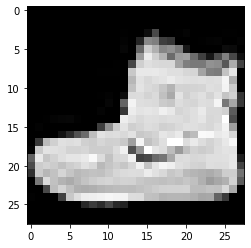

In [ ]:
image, label = sample

plt.imshow(image.squeeze(), cmap='gray')
print('label:', label)

In [ ]:
batch = next(iter(train_loader))
len(batch), type(batch)

(2, list)

In [ ]:
images, labels = batch

In [ ]:
rng = iter(range(10))
print(next(rng))
print(next(rng))

0
1


In [ ]:
images.shape, labels.shape

(torch.Size([5, 1, 28, 28]), torch.Size([5]))

labels: tensor([6, 3, 0, 8, 3, 8, 0, 0, 0, 7, 4, 8, 0, 0, 5, 7, 2, 2, 6, 8, 7, 7, 5, 5, 4, 0, 7, 7, 0, 2, 5, 9])


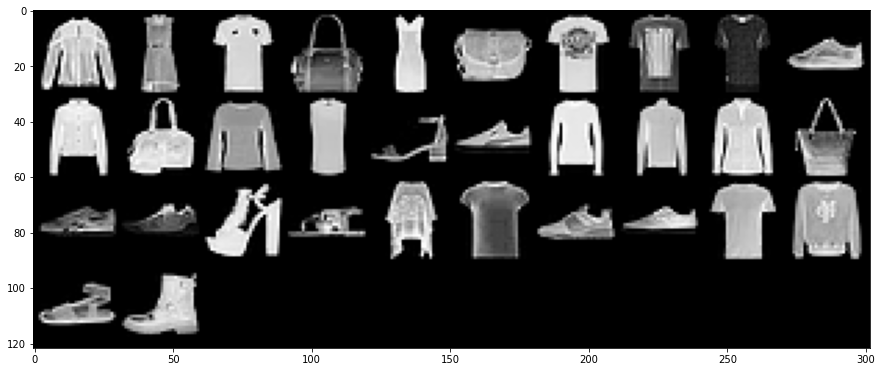

In [ ]:
train_loader = torch.utils.data.DataLoader(
    train_set, 
    batch_size=32,
    shuffle=True
)
batch = next(iter(train_loader))
images, labels = batch
grid = torchvision.utils.make_grid(images, nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))
print('labels:', labels)

In [ ]:
import torch.nn as nn

class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer = None

  def forward(self, t):
    t = self.layer(t)
    return t

In [ ]:
from torch.utils.data import Dataset

class MyDataset(Dataset):
  def __init__(self):
    self.data = (
        "This was an amazing product",
        "This was this shitiest product I have seen",
        "Amazing product, fast delivery",
        "Had to sell my kidney to buy this! And now I have to sell my heart to get it fixed!!",
        "Good one",
        "Bad, don't buy",
        "I was missing something!"
    )
    
  def __getitem__(self, index):
    return self.data[index]

  def __len__(self):
    return len(self.data)

myData = MyDataset()

for m in myData:
  print(m)

This was an amazing product
This was this shitiest product I have seen
Amazing product, fast delivery
Had to sell my kidney to buy this! And now I have to sell my heart to get it fixed!!
Good one
Bad, don't buy
I was missing something!


In [ ]:
len(myData)

7

In [ ]:
myData.train_labels

AttributeError: ignored

In [ ]:
train_loader = torch.utils.data.DataLoader(
    myData, 
    batch_size = 2, 
    shuffle=True
)

In [ ]:
for tr in train_loader:
  print(tr)

["Bad, don't buy", 'Good one']
['Amazing product, fast delivery', 'This was an amazing product']
['This was this shitiest product I have seen', 'Had to sell my kidney to buy this! And now I have to sell my heart to get it fixed!!']
['I was missing something!']


In [ ]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform = transforms.Compose([
          transforms.ToTensor()
    ])
)

In [ ]:
for f in train_set:
  print(f)
  break

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039,
          0.0000, 0.0000, 0.0510, 0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039,
      

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth=120)

len(train_set)

60000

In [ ]:
train_set.train_labels

/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
dir(train_set)

['__add__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_exists',
 '_check_legacy_exist',
 '_format_transform_repr',
 '_is_protocol',
 '_load_data',
 '_load_legacy_data',
 '_repr_indent',
 'class_to_idx',
 'classes',
 'data',
 'download',
 'extra_repr',
 'mirrors',
 'processed_folder',
 'raw_folder',
 'resources',
 'root',
 'target_transform',
 'targets',
 'test_data',
 'test_file',
 'test_labels',
 'train',
 'train_data',
 'train_labels',
 'training_file',
 'transform',
 'transforms']

In [ ]:
train_set.train_labels.bincount()

/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [ ]:
sample = next(iter(train_set))
sample

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039,
           0.0000, 0.0000, 0.0510, 0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000, 0.0000, 0.0000, 0.0000, 0.00

In [ ]:
image, label = sample
image.size()

torch.Size([1, 28, 28])

label: 9


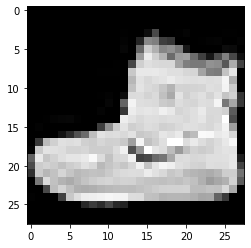

In [ ]:
plt.imshow(image.squeeze(), cmap='gray')
print('label:', label)

In [ ]:
train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size = 32,
    shuffle=True
)

In [ ]:
for tl in train_loader:
  print(len(tl[0]))
  print(tl[1])
  break

32
tensor([7, 4, 6, 6, 5, 6, 8, 6, 5, 7, 4, 7, 1, 6, 6, 9, 0, 2, 9, 3, 4, 5, 7, 1, 1, 9, 1, 5, 8, 5, 3, 0])


In [ ]:
batch = next(iter(train_loader))
batch

[tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000

In [ ]:
images, labels = batch

images.shape, labels.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

labels: tensor([5, 7, 5, 3, 0, 0, 4, 3, 0, 4, 9, 3, 6, 9, 4, 6, 5, 1, 3, 3, 5, 6, 2, 1, 9, 6, 0, 7, 1, 2, 1, 6])


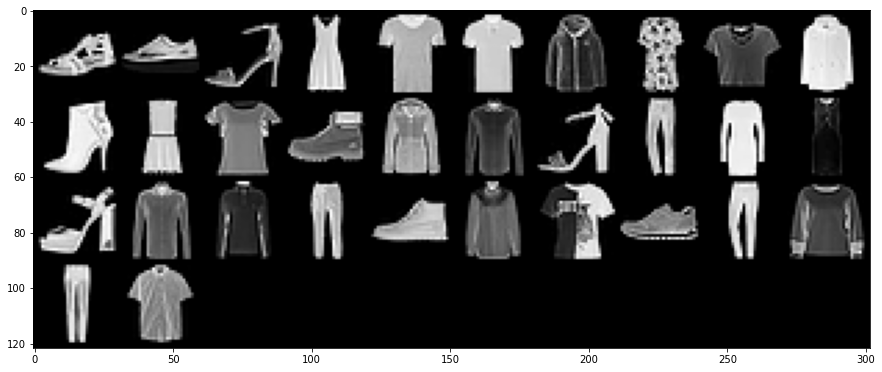

In [ ]:
grid = torchvision.utils.make_grid(images, nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))
print('labels:', labels)

In [ ]:
import torch.nn as nn

class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer = None

  def forward(self, t):
    t = self.layer(t)
    return t

In [ ]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    # input 28x28 k = 5, receptive_field = 5, output = 24
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size = 5)
    # input 24x24 k = 5, receptive_field = 9, output = 20
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size = 5)
    # input 12x20x20 >> flatten 4800
    # input 4800, output 120
    self.fc1 = nn.Linear(in_features=12*20*20, out_features=120)
    # input 120 output = 60
    self.fc2 = nn.Linear(in_features=120, out_features=60)
    # input 60, output = 10
    self.out = nn.Linear(in_features=60, out_features=10)

  def forward(self, t):
    return t

In [ ]:
network = Network()
print(network)

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=4800, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)


In [ ]:
network.fc1

Linear(in_features=4800, out_features=120, bias=True)

In [ ]:
dir(network.fc2)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__constants__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_buffers',
 '_call_impl',
 '_forward_hooks',
 '_forward_pre_hooks',
 '_get_backward_hooks',
 '_get_name',
 '_is_full_backward_hook',
 '_load_from_state_dict',
 '_load_state_dict_post_hooks',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',
 '_modules',
 '_named_members',
 '_non_persistent_buffers_set',
 '_parameters',
 '_register_load_state_dict_pre_hook',
 '_register_state_dict_hook',
 '_replicate_for_data_parallel',
 '_save_to_state_dict',
 '_slow_forward',
 '_state_d

In [ ]:
network.fc2.weight

Parameter containing:
tensor([[-0.0361, -0.0599, -0.0473,  ..., -0.0223,  0.0290,  0.0635],
        [ 0.0511, -0.0143,  0.0515,  ...,  0.0529,  0.0682, -0.0698],
        [-0.0466, -0.0726,  0.0885,  ..., -0.0893,  0.0837,  0.0446],
        ...,
        [-0.0200, -0.0637, -0.0280,  ..., -0.0379, -0.0834, -0.0367],
        [-0.0625,  0.0169,  0.0831,  ...,  0.0167, -0.0318,  0.0065],
        [ 0.0294, -0.0748, -0.0658,  ...,  0.0448,  0.0040, -0.0888]], requires_grad=True)

In [ ]:
network.fc2.weight.shape

torch.Size([60, 120])

In [ ]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size = 5)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size = 5)
    self.fc1 = nn.Linear(in_features=12*20*20, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=60)
    self.out = nn.Linear(in_features=60, out_features=10)

  def forward(self, t):
    return t

  network = Network()

  for name, param in network.named_parameters():
    print(name, '\t\t',)

conv1.weight 		 torch.Size([6, 1, 5, 5])
conv1.bias 		 torch.Size([6])
conv2.weight 		 torch.Size([12, 6, 5, 5])
conv2.bias 		 torch.Size([12])
fc1.weight 		 torch.Size([120, 4800])
fc1.bias 		 torch.Size([120])
fc2.weight 		 torch.Size([60, 120])
fc2.bias 		 torch.Size([60])
out.weight 		 torch.Size([10, 60])
out.bias 		 torch.Size([10])


In [ ]:
torch.set_grad_enabled(False)

In [ ]:
sample = next(iter(train_set))
image, label = sample
image.shape, image.unsqueeze(0).shape

(torch.Size([1, 28, 28]), torch.Size([1, 1, 28, 28]))

In [ ]:
pred = network(image)

RuntimeError: ignored

In [ ]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.out = nn.Linear(in_features=60, out_features=10)
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size = 5)
    self.fc2 = nn.Linear(in_features=120, out_features=60)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size = 5)
    self.fc1 = nn.Linear(in_features=12*20*20, out_features=120)

  def forward(self, x):
    # conv1
    x = self.conv1(x)
    x = F.relu(x)
    x = self.conv2(x)
    x = F.relu(x)
    x = x.reshape(1, -1)
    # x = x.reshape(1, 12*20*20)
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    x = F.relu(x)
    x = self.out(x)
    return x
network = Network()
sample = next(iter(train_set))
image, label = sample
image.shape, image.unsqueeze(0).shape #<<Fake a batch
pred = network(image)

In [ ]:
pred

tensor([[-0.0268,  0.0025,  0.1478,  0.0209, -0.0571,  0.0784,  0.0088,  0.1191,  0.0525, -0.0517]])

In [ ]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5) 
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
    self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=60)
    self.out = nn.Linear(in_features=60, out_features=10)
  
  def forward(self, t):
    # input layer
    x = t
    # conv1 layer
    x = self.conv1(x) # 28 > 24
    x = F.relu(x)
    x = F.max_pool2d(x, kernel_size=2, stride=2) # 28 | 24 | 12
    # conv2 layer
    x = self.conv2(x) # 12
    x = F.relu(x) # 8
    x = F.max_pool2d(x, kernel_size=2, stride=2) # 12 | 8 | 4 >> 12x4x4
    # reshapre
    x = x.reshape(-1, 12 * 4 * 4)
    # fc1 layer
    x = self.fc1(x)
    x = F.relu(x)
    # fc2 layer
    x = self.fc2(x)
    x = F.relu(x)
    # output layer
    x = self.out(x)
    # x = F.softmax(x, dim=1)
    return x

In [ ]:
torch.set_grad_enabled(False)

In [ ]:
sample = next(iter(train_set)) 
image, label = sample
image.shape, image.unsqueeze(0).shape
network = Network()
pred = network(image)

In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
pred, pred.shape, label

(tensor([[ 0.0893,  0.0450, -0.0863,  0.1193, -0.1100,  0.1036,  0.0853,  0.1526, -0.0377, -0.1059]]),
 torch.Size([1, 10]),
 9)

In [ ]:
pred.argmax(dim=1)

tensor([7])

In [ ]:
F.softmax(pred, dim=1)

tensor([[0.1061, 0.1015, 0.0890, 0.1093, 0.0869, 0.1076, 0.1057, 0.1130, 0.0935, 0.0873]])

In [ ]:
F.softmax(pred, dim=1).sum()

tensor(1.0000)

In [ ]:
data_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size = 10
)

In [ ]:
batch = next(iter(data_loader))
len(batch[0])

10

In [ ]:
images, labels = batch
preds = network(images)
preds.shape

torch.Size([10, 10])

In [ ]:
preds

tensor([[ 0.0893,  0.0450, -0.0863,  0.1193, -0.1100,  0.1036,  0.0853,  0.1526, -0.0377, -0.1059],
        [ 0.0914,  0.0513, -0.0875,  0.1212, -0.1097,  0.1010,  0.0871,  0.1582, -0.0386, -0.1011],
        [ 0.0894,  0.0431, -0.0825,  0.1152, -0.1087,  0.1075,  0.0813,  0.1488, -0.0351, -0.1147],
        [ 0.0904,  0.0441, -0.0828,  0.1139, -0.1082,  0.1071,  0.0865,  0.1507, -0.0375, -0.1123],
        [ 0.0909,  0.0477, -0.0848,  0.1227, -0.1129,  0.1005,  0.0923,  0.1536, -0.0355, -0.1076],
        [ 0.0950,  0.0551, -0.0875,  0.1199, -0.1105,  0.0974,  0.0906,  0.1617, -0.0418, -0.0990],
        [ 0.0873,  0.0408, -0.0871,  0.1135, -0.1102,  0.1045,  0.0801,  0.1475, -0.0401, -0.1096],
        [ 0.0913,  0.0511, -0.0875,  0.1175, -0.1092,  0.1020,  0.0888,  0.1551, -0.0381, -0.1014],
        [ 0.0915,  0.0465, -0.0851,  0.1101, -0.1095,  0.1057,  0.0878,  0.1462, -0.0407, -0.1097],
        [ 0.0944,  0.0443, -0.0838,  0.1111, -0.1060,  0.1057,  0.0940,  0.1465, -0.0507, -0.1066]])

In [ ]:
preds.argmax(dim=1)

tensor([7, 7, 7, 7, 7, 7, 7, 7, 7, 7])

In [ ]:
preds.argmax(dim=1).eq(labels)

tensor([False, False, False, False, False, False,  True, False, False, False])

In [ ]:
def get_num_correct(preds, labels):
  return preds.argmax(dim=1).eq(labels).sum().item()

In [ ]:
get_num_correct(preds, labels)

1

In [ ]:
torch.set_grad_enabled(True)

In [ ]:
preds = network(images)
loss = F.cross_entropy(preds, labels)
loss.item()

2.2863399982452393

In [ ]:
print(network.conv1.weight.grad)

None


In [ ]:
loss.backward()

In [ ]:
print(network.conv1.weight.grad)

tensor([[[[ 6.0354e-03,  5.5412e-03,  6.8879e-03,  6.3565e-03,  6.3997e-03],
          [ 5.2248e-03,  5.4010e-03,  6.6494e-03,  6.6163e-03,  6.1810e-03],
          [ 6.0868e-03,  6.0772e-03,  6.7673e-03,  6.4146e-03,  6.4092e-03],
          [ 6.1697e-03,  5.0628e-03,  5.1001e-03,  6.0109e-03,  5.8618e-03],
          [ 4.7127e-03,  4.1378e-03,  4.8498e-03,  5.7047e-03,  5.0714e-03]]],


        [[[ 1.5430e-03,  7.3735e-04,  2.4853e-03,  1.8228e-03,  2.1786e-03],
          [-3.3199e-04, -8.1076e-04,  5.8743e-04,  1.5918e-03,  1.4526e-03],
          [ 7.8225e-04,  2.0163e-04, -2.5368e-04,  4.9971e-04,  1.0647e-03],
          [-1.0615e-03, -8.1528e-04, -1.2778e-03, -7.1882e-04, -2.6948e-04],
          [-7.3225e-04, -4.7490e-04, -1.8984e-04, -2.4158e-04,  9.1377e-04]]],


        [[[-2.2993e-03, -1.9590e-03, -2.0231e-03, -2.3810e-03, -1.6706e-03],
          [-1.6950e-03, -1.3002e-03, -8.7053e-04, -1.1297e-03,  3.7479e-04],
          [-1.0318e-03, -1.4142e-03, -1.4185e-03, -1.5027e-03, -5.28

In [ ]:
print(network.conv1.weight.grad.shape)

torch.Size([6, 1, 5, 5])


In [ ]:
optimizer = optim.Adam(network.parameters(), lr = 0.001)

In [ ]:
loss.item(), get_num_correct(preds, labels)

(2.2863399982452393, 1)

In [ ]:
optimizer.step()

In [ ]:
preds = network(images)
loss = F.cross_entropy(preds, labels)
loss.item(), get_num_correct(preds, labels)

(2.2749741077423096, 1)

In [ ]:
loss.backward()
optimizer.step()
preds = network(images)
loss = F.cross_entropy(preds, labels)
loss.item(), get_num_correct(preds, labels)

(2.2662081718444824, 1)

In [ ]:
loss.backward()
optimizer.step()
preds = network(images)
loss = F.cross_entropy(preds, labels)
loss.item(), get_num_correct(preds, labels)

(2.2590155601501465, 3)

In [ ]:
loss.backward()
optimizer.step()
preds = network(images)
loss = F.cross_entropy(preds, labels)
loss.item(), get_num_correct(preds, labels)

(2.252039670944214, 3)

In [ ]:
loss.backward()
optimizer.step()
preds = network(images)
loss = F.cross_entropy(preds, labels)
loss.item(), get_num_correct(preds, labels)

(2.244389295578003, 5)

In [ ]:
loss.backward()
optimizer.step()
preds = network(images)
loss = F.cross_entropy(preds, labels)
loss.item(), get_num_correct(preds, labels)

(2.235292434692383, 4)

In [ ]:
loss.backward()
optimizer.step()
preds = network(images)
loss = F.cross_entropy(preds, labels)
loss.item(), get_num_correct(preds, labels)

(2.2247414588928223, 5)

# Serious


In [ ]:
network = Network()

train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size=100,
)
optimizer = optim.Adam(network.parameters(), lr=0.01)

batch = next(iter(train_loader)) # get batch
images, labels = batch
preds = network(images)
loss = F.cross_entropy(preds, labels) # calculating loss

loss.backward() # Calculate GRadients
optimizer.step() # Update weights

print('loss1:', loss.item())
preds = network(images)
loss = F.cross_entropy(preds, labels)
print('loss2:', loss.item())


loss1: 2.30911922454834
loss2: 2.265679121017456


In [ ]:
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

total_loss = 0
total_correct = 0

for batch in train_loader: # Get Batch
    images, labels = batch 

    preds = network(images) # Pass Batch
    loss = F.cross_entropy(preds, labels) # Calculate Loss

    optimizer.zero_grad()
    loss.backward() # Calculate Gradients
    optimizer.step() # Update Weights

    total_loss += loss.item()
    total_correct += get_num_correct(preds, labels)

print(
    "epoch:", 0, 
    "total_correct:", total_correct, 
    "loss:", total_loss
)

epoch: 0 total_correct: 47818 loss: 322.834869787097


In [ ]:
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

for epoch in range(10):
  total_loss = 0
  total_correct = 0
  for batch in train_loader: # Get Batch
      images, labels = batch 

      preds = network(images) # Pass Batch
      loss = F.cross_entropy(preds, labels) # Calculate Loss

      optimizer.zero_grad()
      loss.backward() # Calculate Gradients
      optimizer.step() # Update Weights

      total_loss += loss.item()
      total_correct += get_num_correct(preds, labels)

  print(
      "epoch:", epoch, 
      "total_correct:", total_correct, 
      "loss:", total_loss
  )

epoch: 0 total_correct: 45858 loss: 369.98896920681
epoch: 1 total_correct: 50906 loss: 244.18750344216824
epoch: 2 total_correct: 51762 loss: 221.19965746998787
epoch: 3 total_correct: 52161 loss: 210.1118665933609
epoch: 4 total_correct: 52378 loss: 203.9252609461546
epoch: 5 total_correct: 52620 loss: 198.17391991615295
epoch: 6 total_correct: 52656 loss: 195.78968866169453
epoch: 7 total_correct: 52795 loss: 193.3784799873829
epoch: 8 total_correct: 52855 loss: 191.94015604257584
epoch: 9 total_correct: 53066 loss: 184.69268681108952
